# Introduction to Neural Networks
In this notebook you will learn how to create and use a neural network to classify articles of clothing. To achieve this, we will use a sub module of TensorFlow called *keras*.

*This guide is based on the following TensorFlow documentation.*

https://www.tensorflow.org/tutorials/keras/classification




## Keras
Before we dive in and start discussing neural networks, I'd like to give a breif introduction to keras.

From the keras official documentation (https://keras.io/) keras is described as follows.

"Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. 

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU."

Keras is a very powerful module that allows us to avoid having to build neural networks from scratch. It also hides a lot of mathematical complexity (that otherwise we would have to implement) inside of helpful packages, modules and methods.

In this guide we will use keras to quickly develop neural networks.



## What is a Neural Network
So, what are these magical things that have been beating chess grandmasters, driving cars, detecting cancer cells and winning video games? 

A deep neural network is a layered representation of data. The term "deep" refers to the presence of multiple layers. Recall that in our core learning algorithms (like linear regression) data was not transformed or modified within the model, it simply existed in one layer. We passed some features to our model, some math was done, an answer was returned. The data was not changed or transformed throughout this process. A neural network processes our data differently. It attempts to represent our data in different ways and in different dimensions by applying specific operations to transform our data at each layer. Another way to express this is that at each layer our data is transformed in order to learn more about it. By performing these transformations, the model can better understand our data and therefore provide a better prediction. 



## How it Works
Before going into too much detail I will provide a very surface level explination of how neural networks work on a mathematical level. All the terms and concepts I discuss will be defined and explained in more detail below.

On a lower level neural networks are simply a combination of elementry math operations and some more advanced linear algebra. Each neural network consists of a sequence of layers in which data passes through. These layers are made up on neurons and the neurons of one layer are connected to the next (see below). These connections are defined by what we call a weight (some numeric value). Each layer also has something called a bias, this is simply an extra neuron that has no connections and holds a single numeric value. Data starts at the input layer and is trasnformed as it passes through subsequent layers. The data at each subsequent neuron is defined as the following.

> $Y =(\sum_{i=0}^n w_i x_i) + b$

> $w$ stands for the weight of each connection to the neuron

> $x$ stands for the value of the connected neuron from the previous value

> $b$ stands for the bias at each layer, this is a constant

> $n$ is the number of connections

> $Y$ is the output of the current neuron

> $\sum$ stands for sum

The equation you just read is called a weighed sum. We will take this weighted sum at each and every neuron as we pass information through the network. Then we will add what's called a bias to this sum. The bias allows us to shift the network up or down by a constant value. It is like the y-intercept of a line.

But that equation is the not complete one! We forgot a crucial part, **the activation function**. This is a function that we apply to the equation seen above to add complexity and dimensionality to our network. Our new equation with the addition of an activation function $F(x)$ is seen below.

> $Y =F((\sum_{i=0}^n w_i x_i) + b)$

Our network will start with predefined activation functions (they may be different at each layer) but random weights and biases. As we train the network by feeding it data it will learn the correct weights and biases and adjust the network accordingly using a technqiue called **backpropagation** (explained below). Once the correct weights and biases have been learned our network will hopefully be able to give us meaningful predictions. We get these predictions by observing the values at our final layer, the output layer. 




## Breaking Down The Neural Network!

Before we dive into any code lets break down how a neural network works and what it does.

![alt text](http://www.extremetech.com/wp-content/uploads/2015/07/NeuralNetwork.png)
*Figure 1*




### Data
The type of data a neural network processes varies drastically based on the problem being solved. When we build a neural network, we define what shape and kind of data it can accept. It may sometimes be neccessary to modify our dataset so that it can be passed to our neural network. 

Some common types of data a neural network uses are listed below.
- Vector Data (2D)
- Timeseries or Sequence (3D)
- Image Data (4D)
- Video Data (5D)

There are of course many different types or data, but these are the main categories.



### Layers
As we mentioned earlier each neural network consists of multiple layers. At each layer a different transformation of data occurs. Our initial input data is fed through the layers and eventually arrives at the output layer where we will obtain the result.
#### Input Layer
The input layer is the layer that our initial data is passed to. It is the first layer in our neural network.
#### Output Layer
The output layer is the layer that we will retrive our results from. Once the data has passed through all other layers it will arrive here.
#### Hidden Layer(s)
All the other layers in our neural network are called "hidden layers". This is because they are hidden to us, we cannot observe them. Most neural networks consist of at least one hidden layer but can have an unlimited amount. Typically, the more complex the model the more hidden layers.
#### Neurons
Each layer is made up of what are called neurons. Neurons have a few different properties that we will discuss later. The important aspect to understand now is that each neuron is responsible for generating/holding/passing ONE numeric value. 

This means that in the case of our input layer it will have as many neurons as we have input information. For example, say we want to pass an image that is 28x28 pixels, thats 784 pixels. We would need 784 neurons in our input layer to capture each of these pixels. 

This also means that our output layer will have as many neurons as we have output information. The output is a little more complicated to understand so I'll refrain from an example right now but hopefully you're getting the idea.

But what about our hidden layers? Well these have as many neurons as we decide. We'll discuss how we can pick these values later but understand a hidden layer can have any number of neurons.
####Connected Layers
So how are all these layers connected? Well the neurons in one layer will be connected to neurons in the subsequent layer. However, the neurons can be connected in a variety of different ways. 

Take for example *Figure 1* (look above). Each neuron in one layer is connected to every neuron in the next layer. This is called a **dense** layer. There are many other ways of connecting layers but well discuss those as we see them. 



### Weights
Weights are associated with each connection in our neural network. Every pair of connected nodes will have one weight that denotes the strength of the connection between them. These are vital to the inner workings of a neural network and will be tweaked as the neural network is trained. The model will try to determine what these weights should be to achieve the best result. Weights start out at a constant or random value and will change as the network sees training data.

### Biases
Biases are another important part of neural networks and will also be tweaked as the model is trained. A bias is simply a constant value associated with each layer. It can be thought of as an extra neuron that has no connections. The purpose of a bias is to shift an entire activation function by a constant value. This allows a lot more flexibllity when it comes to choosing an activation and training the network. There is one bias for each layer.

### Activation Function
Activation functions are simply a function that is applied to the weighed sum of a neuron. They can be anything we want but are typically higher order/degree functions that aim to add a higher dimension to our data. We would want to do this to introduce more comolexity to our model. By transforming our data to a higher dimension, we can typically make better, more complex predictions.

A list of some common activation functions and their graphs can be seen below.

- Relu (Rectified Linear Unit)

![alt text](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)
- Tanh (Hyperbolic Tangent)

![alt text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
- Sigmoid 

![alt text](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)



### Backpropagation
Backpropagation is the fundemental algorithm behind training neural networks. It is what changes the weights and biases of our network. To fully explain this process, we need to start by discussing something called a cost/loss function.

#### Loss/Cost Function
As we now know our neural network feeds information through the layers until it eventually reaches an output layer. This layer contains the results that we look at to determine the prediciton from our network. In the training phase it is likely that our network will make many mistakes and poor predicitions. In fact, at the start of training our network doesn't know anything (it has random weights and biases)! 

We need some way of evaluating if the network is doing well and how well it is doing. For our training data we have the features (input) and the labels (expected output), because of this we can compare the output from our network to the expected output. Based on the difference between these values we can determine if our network has done a good job or poor job. If the network has done a good job, we'll make minor changes to the weights and biases. If it has done a poor job our changes may be more drastic.

So, this is where the cost/loss function comes in. This function is responsible for determining how well the network did. We pass it the output and the expected output, and it returns to us some value representing the cost/loss of the network. This effectively makes the networks job to optimize this cost function, trying to make it as low as possible. 

Some common loss/cost functions include.
- Mean Squared Error
- Mean Absolute Error
- Hinge Loss

#### Gradient Descent
Gradient descent and backpropagation are closely related. Gradient descent is the algorithm used to find the optimal paramaters (weights and biases) for our network, while backpropagation is the process of calculating the gradient that is used in the gradient descent step. 

Gradient descent requires some pretty advanced calculus and linear algebra to understand so we'll stay away from that for now. Let's just read the formal definition for now.

"Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model." (https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

And that's all we really need to know for now. I'll direct you to the video for a more in depth explination.

![alt text](https://cdn-images-1.medium.com/max/1000/1*iU1QCnSTKrDjIPjSAENLuQ.png)



### Optimizer
You may sometimes see the term optimizer or optimization function. This is simply the function that implements the backpropagation algorithm described above. Here's a list of a few common ones.
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient
- Adam

*This article explains them quite well is where I've pulled this list from.* (https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

# Creating a Neural Network
Okay now you have reached the exciting part of this tutorial! No more math and complex explinations. Time to get hands on and train a very basic neural network.

*As stated earlier this guide is based off of the following TensorFlow tutorial.*
https://www.tensorflow.org/tutorials/keras/classification


### Imports

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### Dataset
For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


Let's have a look at this data to see what we are working with.

In [3]:
train_images.shape

(60000, 28, 28)

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Fianlly let's look at what some of these images look like!

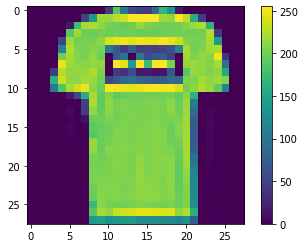

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing
The last step before creating our model is to *preprocess* our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values. 



In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building the Model
Now it's time to build the model! We are going to use a keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()

model.add(Flatten(input_shape=(28, 28), name="flatten_1"))
model.add(Dense(128, activation='relu', name="dense_1"))
model.add(Dense(10, activation='softmax', name="dense_output"))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_output (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28, 28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28, 28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

### Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

## Training the Model
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [10]:
epochs = 10
validation_split = 0.10

history = model.fit(train_images, train_labels, 
                    epochs=epochs, 
                    validation_split=validation_split)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5073 - accuracy: 0.8218 - val_loss: 0.3877 - val_accuracy: 0.8565
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3791 - accuracy: 0.8642 - val_loss: 0.3604 - val_accuracy: 0.8712
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3434 - accuracy: 0.8745 - val_loss: 0.3435 - val_accuracy: 0.8785
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3160 - accuracy: 0.8832 - val_loss: 0.3464 - val_accuracy: 0.8707
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2975 - accuracy: 0.8897 - val_loss: 0.3349 - val_accuracy: 0.8788
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2838 - accuracy: 0.8954 - val_loss: 0.3307 - val_accuracy: 0.8802
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2704 - accuracy: 0.8991 - val_loss: 0.3295 - val_accuracy:

## Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
(https://keras.io/models/sequential/)

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 798us/step - loss: 0.3408 - accuracy: 0.8817
Test accuracy: 0.8816999793052673


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.

And now we have a trained model that's ready to use to predict some values!

## Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.

In [12]:
predictions = model.predict(test_images)

This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1.

In [13]:
predictions[0]

array([3.0851302e-09, 3.3350117e-10, 1.1074089e-10, 6.9785839e-12,
       4.6257234e-09, 3.3317856e-04, 1.1814582e-09, 3.5732012e-02,
       9.5847481e-09, 9.6393484e-01], dtype=float32)

If we wan't to get the value with the highest score we can use a useful function from numpy called ```argmax()```. This simply returns the index of the maximium value from a numpy array. 

In [14]:
np.argmax(predictions[0])

9

And we can check if this is correct by looking at the value of the cooresponding test label.

In [15]:
test_labels[0]

9

## Verifying Predictions
I've written a small function here to help us verify predictions with some simple visuals.

Try again...
Try again...
Try again...
Expected: Coat


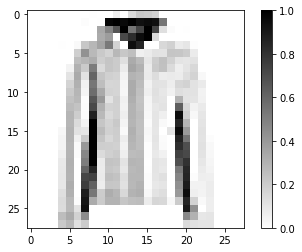

Guess: Coat - Accuracy: 91.2%


In [16]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class, np.max(prediction)*100)


def show_image(img, label, guess, accuracy):
  print("Expected: " + label)
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print(f'Guess: {guess} - Accuracy: {accuracy:.1f}%')


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

And that's pretty much it for an introduction to neural networks!

## Sources

1. Doshi, Sanket. “Various Optimization Algorithms For Training Neural Network.” Medium, Medium, 10 Mar. 2019, www.medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6.

2. “Basic Classification: Classify Images of Clothing &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/keras/classification.

3. “Gradient Descent¶.” Gradient Descent - ML Glossary Documentation, www.ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html.

4. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.

5. “Keras: The Python Deep Learning Library.” Home - Keras Documentation, www.keras.io/.